In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
population_df = pd.read_csv('Unit04 Global_Population.csv', na_values='?')
gdp_df = pd.read_csv('Unit04 Global_GDP.csv', na_values='?')


In [41]:
population_df.head()



,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211,55438,56225,56695,57032,57360,...,102560,103159,103774,104341,104872,105366,105845,106314,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,9543200,9744772,9956318,...,31161378,32269592,33370804,34413603,35383028,36296111,37171922,38041757,38928341,39835000
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765,134159786,137614644,141202036,144920186,148769974,...,547482863,562601578,578075373,593871847,609978946,626392880,643090131,660046272,677243299,694664000
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419,98407221,100506960,102691339,104953470,107289875,...,370243017,380437896,390882979,401586651,412551299,423769930,435229381,446911598,458803476,470898000
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,1762621,1814135,1864791,...,2900401,2895092,2889104,2880703,2876101,2873457,2866376,2854191,2837743,2832000


In [42]:
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.929944e+10,1.970954e+10,2.147872e+10,2.571501e+10,2.351080e+10,2.679160e+10,...,9.427110e+11,9.498490e+11,9.635600e+11,9.837490e+11,9.186470e+11,8.720230e+11,9.842560e+11,1.011720e+12,1.008380e+12,9.188150e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.514870e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10


In [43]:
#to provide the consistency between datasets
gdp_years = list(map(str, range(2001, 2021)))  # GDP data from 2001 to 2020
population_years = list(map(str, range(2001, 2022)))  # Population data from 2001 to 2021




In [44]:
# Convert all relevant columns to numeric, coercing errors to NaN, any values can not be converted replaced with NAN
population_df[population_years] = population_df[population_years].apply(pd.to_numeric, errors='coerce')
gdp_df[gdp_years] = gdp_df[gdp_years].apply(pd.to_numeric, errors='coerce')


In [45]:
# Calculate mean population and GDP per capita
population_df['Mean Population'] = population_df[population_years].mean(axis=1, skipna=True)
gdp_df['Mean GDP per Capita'] = gdp_df[gdp_years].mean(axis=1, skipna=True)

In [46]:
# Merge the two dataframes on 'Country Name' for comprehensive analysis
merged_df = pd.merge(population_df[['Country Name', 'Mean Population']], 
                     gdp_df[['Country Name', 'Mean GDP per Capita']], 
                     on='Country Name')

In [47]:
print(merged_df)

                    Country Name  Mean Population  Mean GDP per Capita
0                          Aruba     1.014995e+05         2.553357e+09
1                          Aruba     1.020119e+05         2.553357e+09
2                    Afghanistan     3.067118e+07         1.402300e+10
3    Africa Eastern and Southern     5.398680e+08         7.441522e+11
4     Africa Western and Central     3.647774e+08         5.570494e+11
..                           ...              ...                  ...
262           West Bank and Gaza     3.901664e+06         1.014374e+10
263                        World     7.012228e+09         6.670294e+13
264                  Yemen, Rep.     2.396467e+07         2.558856e+10
265                       Zambia     1.433821e+07         1.740083e+10
266                     Zimbabwe     1.314476e+07         1.253090e+10

[267 rows x 3 columns]


In [48]:
large_population_countries = merged_df[merged_df['Mean Population'] > 1e8]
print(large_population_countries)

                                          Country Name  Mean Population  \
3                          Africa Eastern and Southern     5.398680e+08   
4                           Africa Western and Central     3.647774e+08   
11                                          Arab World     3.639153e+08   
19                                          Bangladesh     1.491266e+08   
30                                              Brazil     1.968927e+08   
43                      Central Europe and the Baltics     1.044020e+08   
47                                               China     1.347101e+09   
63                          Early-demographic dividend     2.948548e+09   
64                                 East Asia & Pacific     2.224373e+09   
65         East Asia & Pacific (excluding high income)     1.983376e+09   
66          East Asia & Pacific (IDA & IBRD countries)     1.958708e+09   
75                                           Euro area     3.351254e+08   
76                       

In [49]:
country_list = ['Cyprus', 'Turkey', 'Spain']
countries_detail = merged_df[merged_df['Country Name'].isin(country_list)]
print(countries_detail)

    Country Name  Mean Population  Mean GDP per Capita
57        Cyprus     1.107070e+06         2.174228e+10
224        Spain     4.544326e+07         1.254031e+12
246       Turkey     7.422008e+07         6.787698e+11


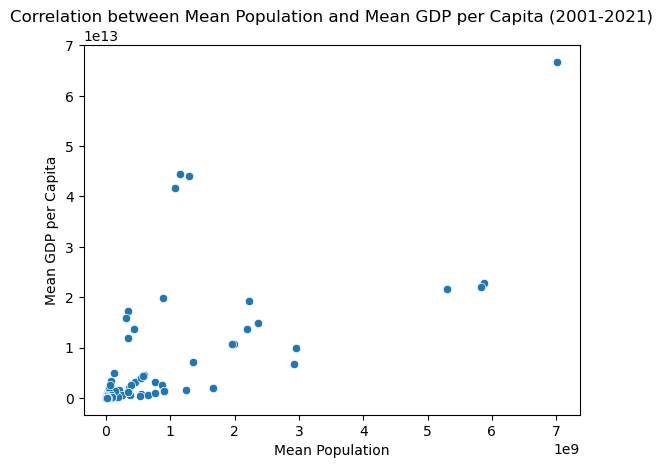

In [50]:
sns.scatterplot(x='Mean Population', y='Mean GDP per Capita', data=merged_df)
plt.title('Correlation between Mean Population and Mean GDP per Capita (2001-2021)')
plt.show()

In [51]:
correlation = merged_df['Mean Population'].corr(merged_df['Mean GDP per Capita'])
print(f'Pearson Correlation Coefficient: {correlation}')

Pearson Correlation Coefficient: 0.7206892549668814


In [62]:

x = merged_df[['Mean Population']].values  # Features
y = merged_df['Mean GDP per Capita'].values
# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Handle missing values in target variable
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.reshape(-1, 1)).ravel()




In [65]:

#to predict GDP per capita based on mean population.
model = LinearRegression()
model.fit(x_imputed, y_imputed)


y_pred = model.predict(x_imputed)


print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model coefficients: [5984.07923894]
Model intercept: 551878002569.0361


In [66]:
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import pearsonr

# Calculate performance metrics, evaluate the model
mse = mean_squared_error(y_imputed, y_pred)
r2 = r2_score(y_imputed, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.4914335114145615e+25
R-squared: 0.5065400344559292


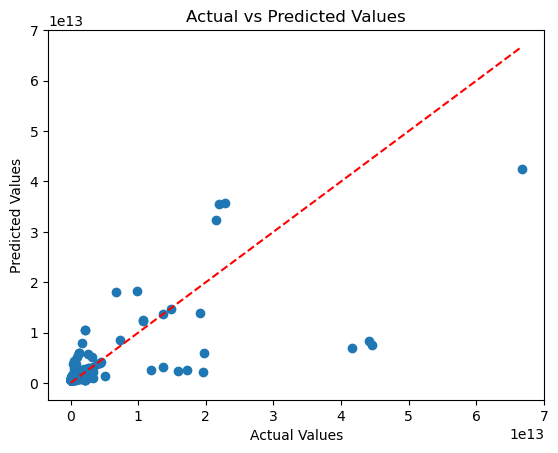

In [67]:
plt.scatter(y_imputed, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_imputed), max(y_imputed)], [min(y_imputed), max(y_imputed)], color='red', linestyle='--')
plt.show()


In [68]:
# Pearson Correlation Coefficient, how strongly the predicted values are linearly related to the true values, which complements the other performance metrics you've calculated.
corr, _ = pearsonr(y_imputed, y_pred)
print(f"Pearson Correlation Coefficient: {corr}")

Pearson Correlation Coefficient: 0.7117162597945398
